In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/large_hospital_data.csv")

In [ ]:
df.head()

,Patient_ID,Age,Gender,Medical_History,Current_Condition,Appointment_Date,Insurance_Status,Queue_ID,Arrival_Time,Doctor_ID,...,Reorder_Level,Supplier_ID,Doctor_Name,Specialization,Available_Slots,Current_Patients,Hospital_ID,Location,Bed_Availability,Emergency_Transfer_Protocol
0,P0001,45,Male,"Diabetes, Hypertension",Chest Pain,2024-09-05,Covered,Q0001,09:00 AM,D001,...,100,S001,Dr. John Smith,Cardiology,9:00 AM - 12:00 PM,5,H001,Central Delhi,15,Link to protocol
1,P0002,30,Female,Asthma,Shortness of Breath,2024-09-06,Covered,Q0002,09:15 AM,D002,...,50,S002,Dr. Jane Doe,Pulmonology,9:00 AM - 11:30 AM,3,H002,South Delhi,10,Link to protocol
2,P0003,60,Male,Hypertension,Headache,2024-09-07,Not Covered,Q0003,09:30 AM,D003,...,80,S003,Dr. John Smith,Cardiology,9:00 AM - 12:00 PM,5,H003,North Delhi,8,Link to protocol
3,P0004,25,Female,NaN,Fever,2024-09-05,Covered,Q0004,09:45 AM,D004,...,30,S004,Dr. Emily Clark,Neurology,10:00 AM - 1:00 PM,4,H004,East Delhi,12,Link to protocol
4,P0005,50,Male,Diabetes,Vision Problems,2024-09-08,Not Covered,Q0005,10:00 AM,D005,...,100,S005,Dr. John Smith,Cardiology,9:00 AM - 12:00 PM,5,H005,West Delhi,5,Link to protocol


In [ ]:
df.shape

(1000, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Patient_ID                   1000 non-null   object
 1   Age                          1000 non-null   int64 
 2   Gender                       1000 non-null   object
 3   Medical_History              800 non-null    object
 4   Current_Condition            1000 non-null   object
 5   Appointment_Date             1000 non-null   object
 6   Insurance_Status             1000 non-null   object
 7   Queue_ID                     1000 non-null   object
 8   Arrival_Time                 1000 non-null   object
 9   Doctor_ID                    1000 non-null   object
 10  Waiting_Time                 1000 non-null   object
 11  Consultation_Time            1000 non-null   object
 12  Bed_ID                       1000 non-null   object
 13  Ward_Type                    1000 

In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
Patient_ID,0.0
Age,0.0
Gender,0.0
Medical_History,20.0
Current_Condition,0.0
Appointment_Date,0.0
Insurance_Status,0.0
Queue_ID,0.0
Arrival_Time,0.0
Doctor_ID,0.0


In [ ]:
df.corr(numeric_only=True)

,Age,Current_Stock,Reorder_Level,Current_Patients,Bed_Availability
Age,1.000000,0.624254,0.796858,0.795554,-0.432983
Current_Stock,0.624254,1.000000,0.947467,0.741825,0.091708
Reorder_Level,0.796858,0.947467,1.000000,0.771805,-0.210800
Current_Patients,0.795554,0.741825,0.771805,1.000000,-0.146805
Bed_Availability,-0.432983,0.091708,-0.210800,-0.146805,1.000000


In [ ]:
df.describe()

,Age,Current_Stock,Reorder_Level,Current_Patients,Bed_Availability
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,42.000000,310.000000,72.000000,4.4000,10.000000
std,12.890546,128.126564,27.870715,0.8004,3.407581
min,25.000000,150.000000,30.000000,3.0000,5.000000
25%,30.000000,200.000000,50.000000,4.0000,8.000000
50%,45.000000,300.000000,80.000000,5.0000,10.000000
75%,50.000000,400.000000,100.000000,5.0000,12.000000
max,60.000000,500.000000,100.000000,5.0000,15.000000


In [ ]:
df.drop(columns=["Assigned_Patient_ID","Turnover_Time","Patient_ID","Queue_ID"],inplace=True)

In [ ]:
#len(df["Patient_ID"].unique())

In [ ]:
#len(df["Queue_ID"].unique())

In [ ]:
len(df["Doctor_ID"].unique())

5

In [ ]:
len(df["Bed_ID"].unique())

100

In [ ]:
len(df["Item_ID"].unique())

100

In [ ]:
len(df["Supplier_ID"].unique())

10

In [ ]:
len(df["Hospital_ID"].unique())

5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          1000 non-null   int64 
 1   Gender                       1000 non-null   object
 2   Medical_History              800 non-null    object
 3   Current_Condition            1000 non-null   object
 4   Appointment_Date             1000 non-null   object
 5   Insurance_Status             1000 non-null   object
 6   Arrival_Time                 1000 non-null   object
 7   Doctor_ID                    1000 non-null   object
 8   Waiting_Time                 1000 non-null   object
 9   Consultation_Time            1000 non-null   object
 10  Bed_ID                       1000 non-null   object
 11  Ward_Type                    1000 non-null   object
 12  Occupancy_Status             1000 non-null   object
 13  Item_ID                      1000 

In [ ]:
df["Gender"].value_counts()

,count
Gender,
Male,600
Female,400


In [ ]:
df["Medical_History"].value_counts()

,count
Medical_History,
"Diabetes, Hypertension",200
Asthma,200
Hypertension,200
Diabetes,200


In [ ]:
ct=pd.crosstab(df["Gender"],df["Medical_History"])

In [ ]:
df["Current_Condition"].value_counts()

,count
Current_Condition,
Chest Pain,200
Shortness of Breath,200
Headache,200
Fever,200
Vision Problems,200


In [ ]:
df.head()

,Age,Gender,Medical_History,Current_Condition,Appointment_Date,Insurance_Status,Arrival_Time,Doctor_ID,Waiting_Time,Consultation_Time,...,Reorder_Level,Supplier_ID,Doctor_Name,Specialization,Available_Slots,Current_Patients,Hospital_ID,Location,Bed_Availability,Emergency_Transfer_Protocol
0,45,Male,"Diabetes, Hypertension",Chest Pain,2024-09-05,Covered,09:00 AM,D001,30 minutes,20 minutes,...,100,S001,Dr. John Smith,Cardiology,9:00 AM - 12:00 PM,5,H001,Central Delhi,15,Link to protocol
1,30,Female,Asthma,Shortness of Breath,2024-09-06,Covered,09:15 AM,D002,15 minutes,25 minutes,...,50,S002,Dr. Jane Doe,Pulmonology,9:00 AM - 11:30 AM,3,H002,South Delhi,10,Link to protocol
2,60,Male,Hypertension,Headache,2024-09-07,Not Covered,09:30 AM,D003,20 minutes,15 minutes,...,80,S003,Dr. John Smith,Cardiology,9:00 AM - 12:00 PM,5,H003,North Delhi,8,Link to protocol
3,25,Female,NaN,Fever,2024-09-05,Covered,09:45 AM,D004,10 minutes,30 minutes,...,30,S004,Dr. Emily Clark,Neurology,10:00 AM - 1:00 PM,4,H004,East Delhi,12,Link to protocol
4,50,Male,Diabetes,Vision Problems,2024-09-08,Not Covered,10:00 AM,D005,25 minutes,20 minutes,...,100,S005,Dr. John Smith,Cardiology,9:00 AM - 12:00 PM,5,H005,West Delhi,5,Link to protocol


In [ ]:
df["Insurance_Status"].value_counts()

,count
Insurance_Status,
Covered,600
Not Covered,400


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.crosstab(df["Gender"],df["Insurance_Status"])

Insurance_Status,Covered,Not Covered
Gender,,
Female,400,0
Male,200,400


<Axes: xlabel='Insurance_Status', ylabel='Gender'>

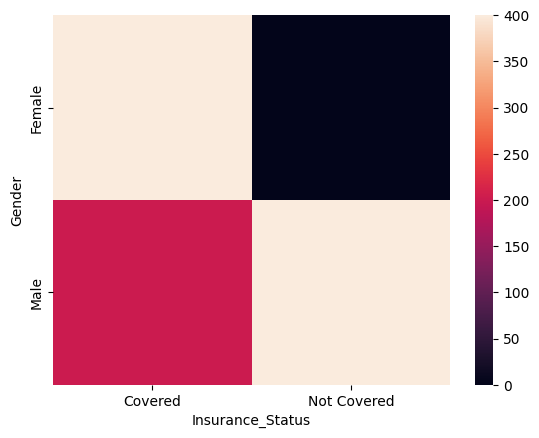

In [ ]:
sns.heatmap(pd.crosstab(df["Gender"],df["Insurance_Status"]))

In [ ]:
len(df["Appointment_Date"].unique())

4

In [ ]:
df["Appointment_Date"].value_counts()

,count
Appointment_Date,
2024-09-05,400
2024-09-06,200
2024-09-07,200
2024-09-08,200


In [ ]:
df["Appointment_year"]=pd.to_datetime(df["Appointment_Date"]).dt.year

In [ ]:
df["Appointment_month"]=pd.to_datetime(df["Appointment_Date"]).dt.month

In [ ]:
df["Appointment_day"]=pd.to_datetime(df["Appointment_Date"]).dt.day

In [ ]:
df["Arrival_Time"].value_counts()

,count
Arrival_Time,
09:00 AM,200
09:15 AM,200
09:30 AM,200
09:45 AM,200
10:00 AM,200


In [ ]:
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

<ipython-input-416-8cef4b5bf998>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour


In [ ]:
df["Arrival_minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

<ipython-input-417-0836ae8e296a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


In [ ]:
df['Arrival_time_zone'] = df['Arrival_Time'].str.extract(r'(AM|PM)')

In [ ]:
df["Waiting_Time"].value_counts()

,count
Waiting_Time,
30 minutes,200
15 minutes,200
20 minutes,200
10 minutes,200
25 minutes,200


In [ ]:
df["Waiting_minutes"]=df["Waiting_Time"].str.replace('minutes','')

In [ ]:
type(df["Waiting_minutes"][0])

str

In [ ]:
df["Waiting_minutes"]=df["Waiting_minutes"].astype(int)

In [ ]:
df["consultation_minutes"]=df["Consultation_Time"].str.replace('minutes','')

In [ ]:
df["consultation_minutes"]=df["consultation_minutes"].astype(int)

In [ ]:
df["Expiry_year"]=pd.to_datetime(df["Expiry_Date"]).dt.year

In [ ]:
df["Expiry_month"]=pd.to_datetime(df["Expiry_Date"]).dt.month

In [ ]:
df["Expiry_day"]=pd.to_datetime(df["Expiry_Date"]).dt.day

In [ ]:
df["Doctor_Name"].value_counts()

,count
Doctor_Name,
Dr. John Smith,600
Dr. Jane Doe,200
Dr. Emily Clark,200


In [ ]:
df["Specialization"].value_counts()

,count
Specialization,
Cardiology,600
Pulmonology,200
Neurology,200


In [ ]:
df["Location"].value_counts()

,count
Location,
Central Delhi,200
South Delhi,200
North Delhi,200
East Delhi,200
West Delhi,200


In [ ]:
df["Ward_Type"].value_counts()

,count
Ward_Type,
ICU,600
General,400


In [ ]:
df["Occupancy_Status"].value_counts()

,count
Occupancy_Status,
Occupied,600
Available,400


In [ ]:
df["Item_Name"].value_counts()

,count
Item_Name,
Paracetamol,200
Insulin,200
Aspirin,200
Salbutamol,200
Metformin,200


In [ ]:
df["Available_Slots"].value_counts()

,count
Available_Slots,
9:00 AM - 12:00 PM,600
9:00 AM - 11:30 AM,200
10:00 AM - 1:00 PM,200


In [ ]:
df[['Available_Slot_Start_Time', 'Available_Slot_End_Time']] = df['Available_Slots'].str.split(' - ', expand=True)

In [ ]:
df['Available_Slot_Start_Time'] = df['Available_Slot_Start_Time'].str.replace(r'AM|PM', '', regex=True).str.strip()
df['Available_Slot_End_Time'] = df['Available_Slot_End_Time'].str.replace(r'AM|PM', '', regex=True).str.strip()

In [ ]:
df["Available_Slot_Start_hour"] = pd.to_datetime(df["Available_Slot_Start_Time"]).dt.hour

<ipython-input-437-919957d5f684>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Available_Slot_Start_hour"] = pd.to_datetime(df["Available_Slot_Start_Time"]).dt.hour


In [ ]:
df["Available_Slot_Start_minute"] = pd.to_datetime(df["Available_Slot_Start_Time"]).dt.minute

<ipython-input-438-1172d49e09ba>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Available_Slot_Start_minute"] = pd.to_datetime(df["Available_Slot_Start_Time"]).dt.minute


In [ ]:
df["Available_Slot_end_hour"] = pd.to_datetime(df["Available_Slot_End_Time"]).dt.hour

<ipython-input-439-2f4319deffb5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Available_Slot_end_hour"] = pd.to_datetime(df["Available_Slot_End_Time"]).dt.hour


In [ ]:
df["Available_Slot_end_minute"] = pd.to_datetime(df["Available_Slot_End_Time"]).dt.minute

<ipython-input-440-907e0a4687be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Available_Slot_end_minute"] = pd.to_datetime(df["Available_Slot_End_Time"]).dt.minute


In [ ]:
df.drop(columns=["Appointment_Date","Arrival_Time","Doctor_ID","Waiting_Time","Consultation_Time","Bed_ID","Item_ID","Expiry_Date","Supplier_ID","Hospital_ID","Available_Slots"],inplace=True)

In [ ]:
df.head()

,Age,Gender,Medical_History,Current_Condition,Insurance_Status,Ward_Type,Occupancy_Status,Item_Name,Current_Stock,Reorder_Level,...,consultation_minutes,Expiry_year,Expiry_month,Expiry_day,Available_Slot_Start_Time,Available_Slot_End_Time,Available_Slot_Start_hour,Available_Slot_Start_minute,Available_Slot_end_hour,Available_Slot_end_minute
0,45,Male,"Diabetes, Hypertension",Chest Pain,Covered,ICU,Occupied,Paracetamol,500,100,...,20,2025,1,10,9:00,12:00,9,0,12,0
1,30,Female,Asthma,Shortness of Breath,Covered,General,Available,Insulin,200,50,...,25,2024,12,1,9:00,11:30,9,0,11,30
2,60,Male,Hypertension,Headache,Not Covered,ICU,Available,Aspirin,300,80,...,15,2025,6,15,9:00,12:00,9,0,12,0
3,25,Female,NaN,Fever,Covered,General,Occupied,Salbutamol,150,30,...,30,2024,11,5,10:00,1:00,10,0,1,0
4,50,Male,Diabetes,Vision Problems,Not Covered,ICU,Occupied,Metformin,400,100,...,20,2025,2,20,9:00,12:00,9,0,12,0


In [ ]:
df.drop(columns=["Available_Slot_Start_Time","Available_Slot_End_Time"],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          1000 non-null   int64 
 1   Gender                       1000 non-null   object
 2   Medical_History              800 non-null    object
 3   Current_Condition            1000 non-null   object
 4   Insurance_Status             1000 non-null   object
 5   Ward_Type                    1000 non-null   object
 6   Occupancy_Status             1000 non-null   object
 7   Item_Name                    1000 non-null   object
 8   Current_Stock                1000 non-null   int64 
 9   Reorder_Level                1000 non-null   int64 
 10  Doctor_Name                  1000 non-null   object
 11  Specialization               1000 non-null   object
 12  Current_Patients             1000 non-null   int64 
 13  Location                     1000 

In [ ]:
df.shape

(1000, 31)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si=SimpleImputer(strategy='most_frequent')

In [ ]:
df["Medical_History"]=si.fit_transform(df[["Medical_History"]]).ravel()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          1000 non-null   int64 
 1   Gender                       1000 non-null   object
 2   Medical_History              1000 non-null   object
 3   Current_Condition            1000 non-null   object
 4   Insurance_Status             1000 non-null   object
 5   Ward_Type                    1000 non-null   object
 6   Occupancy_Status             1000 non-null   object
 7   Item_Name                    1000 non-null   object
 8   Current_Stock                1000 non-null   int64 
 9   Reorder_Level                1000 non-null   int64 
 10  Doctor_Name                  1000 non-null   object
 11  Specialization               1000 non-null   object
 12  Current_Patients             1000 non-null   int64 
 13  Location                     1000 

<Axes: ylabel='Age'>

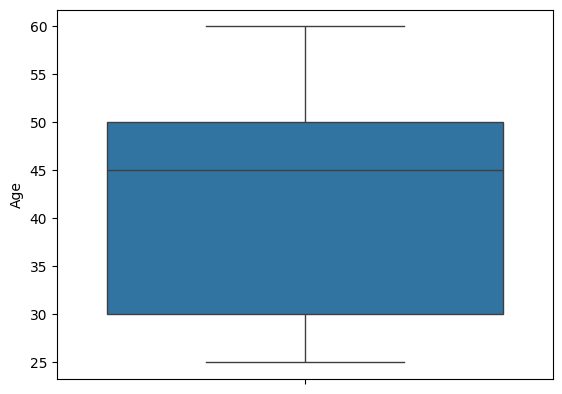

In [ ]:
sns.boxplot(df["Age"])

<Axes: ylabel='Current_Stock'>

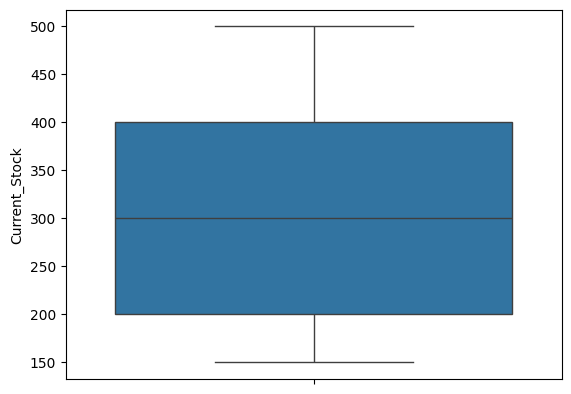

In [ ]:
sns.boxplot(df["Current_Stock"])

<Axes: ylabel='Reorder_Level'>

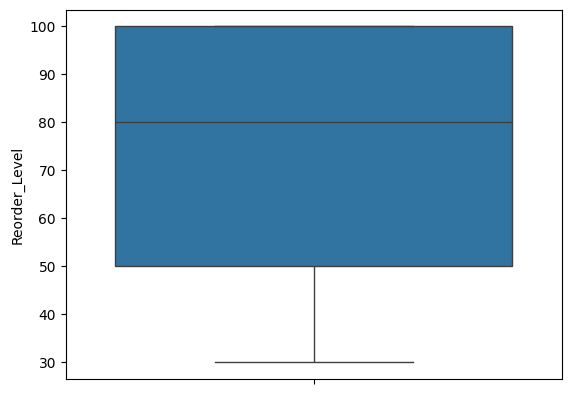

In [ ]:
sns.boxplot(df["Reorder_Level"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          1000 non-null   int64 
 1   Gender                       1000 non-null   object
 2   Medical_History              1000 non-null   object
 3   Current_Condition            1000 non-null   object
 4   Insurance_Status             1000 non-null   object
 5   Ward_Type                    1000 non-null   object
 6   Occupancy_Status             1000 non-null   object
 7   Item_Name                    1000 non-null   object
 8   Current_Stock                1000 non-null   int64 
 9   Reorder_Level                1000 non-null   int64 
 10  Doctor_Name                  1000 non-null   object
 11  Specialization               1000 non-null   object
 12  Current_Patients             1000 non-null   int64 
 13  Location                     1000 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(sparse_output=False)

In [ ]:
categorical_cols=["Gender","Medical_History","Current_Condition","Insurance_Status","Ward_Type","Occupancy_Status","Item_Name","Doctor_Name","Specialization","Location","Emergency_Transfer_Protocol","Arrival_time_zone"]

In [ ]:
encoded_cols=ohe.fit_transform(df[categorical_cols])

In [ ]:
type(encoded_cols)

numpy.ndarray

In [ ]:
encoded_cols

array([[0., 1., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       [0., 1., 0., ..., 0., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       [0., 1., 0., ..., 1., 1., 1.]])

In [ ]:
encoded_cols.shape

(1000, 35)

In [ ]:
encoded_cols=pd.DataFrame(encoded_cols,columns=ohe.get_feature_names_out(categorical_cols))

In [ ]:
encoded_cols

,Gender_Female,Gender_Male,Medical_History_Asthma,Medical_History_Diabetes,"Medical_History_Diabetes, Hypertension",Medical_History_Hypertension,Current_Condition_Chest Pain,Current_Condition_Fever,Current_Condition_Headache,Current_Condition_Shortness of Breath,...,Specialization_Cardiology,Specialization_Neurology,Specialization_Pulmonology,Location_Central Delhi,Location_East Delhi,Location_North Delhi,Location_South Delhi,Location_West Delhi,Emergency_Transfer_Protocol_Link to protocol,Arrival_time_zone_AM
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
998,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
df=pd.concat([df,encoded_cols],axis=1)

In [ ]:
df.drop(columns=categorical_cols,inplace=True)

In [ ]:
df

,Age,Current_Stock,Reorder_Level,Current_Patients,Bed_Availability,Appointment_year,Appointment_month,Appointment_day,Arrival_hour,Arrival_minute,...,Specialization_Cardiology,Specialization_Neurology,Specialization_Pulmonology,Location_Central Delhi,Location_East Delhi,Location_North Delhi,Location_South Delhi,Location_West Delhi,Emergency_Transfer_Protocol_Link to protocol,Arrival_time_zone_AM
0,45,500,100,5,15,2024,9,5,9,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,30,200,50,3,10,2024,9,6,9,15,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,60,300,80,5,8,2024,9,7,9,30,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,25,150,30,4,12,2024,9,5,9,45,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,50,400,100,5,5,2024,9,8,10,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,500,100,5,15,2024,9,5,9,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
996,30,200,50,3,10,2024,9,6,9,15,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
997,60,300,80,5,8,2024,9,7,9,30,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
998,25,150,30,4,12,2024,9,5,9,45,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           1000 non-null   int64  
 1   Current_Stock                                 1000 non-null   int64  
 2   Reorder_Level                                 1000 non-null   int64  
 3   Current_Patients                              1000 non-null   int64  
 4   Bed_Availability                              1000 non-null   int64  
 5   Appointment_year                              1000 non-null   int32  
 6   Appointment_month                             1000 non-null   int32  
 7   Appointment_day                               1000 non-null   int32  
 8   Arrival_hour                                  1000 non-null   int32  
 9   Arrival_minute                                1000 non-null   in

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
df=sc.fit_transform(df)

In [ ]:
type(df)

numpy.ndarray

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.232845,1.483651,1.005141,0.75,1.468051,0.0,0.0,-1.028992,-0.5,-1.028992,...,0.816497,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,0.0,0.0
1,-0.931381,-0.858956,-0.789754,-1.75,0.000000,0.0,0.0,-0.171499,-0.5,-0.171499,...,-1.224745,-0.5,2.0,-0.5,-0.5,-0.5,2.0,-0.5,0.0,0.0
2,1.397071,-0.078087,0.287183,0.75,-0.587220,0.0,0.0,0.685994,-0.5,0.685994,...,0.816497,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,0.0,0.0
3,-1.319456,-1.249390,-1.507712,-0.50,0.587220,0.0,0.0,-1.028992,-0.5,1.543487,...,-1.224745,2.0,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,0.0,0.0
4,0.620920,0.702782,1.005141,0.75,-1.468051,0.0,0.0,1.543487,2.0,-1.028992,...,0.816497,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.232845,1.483651,1.005141,0.75,1.468051,0.0,0.0,-1.028992,-0.5,-1.028992,...,0.816497,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,-0.5,0.0,0.0
996,-0.931381,-0.858956,-0.789754,-1.75,0.000000,0.0,0.0,-0.171499,-0.5,-0.171499,...,-1.224745,-0.5,2.0,-0.5,-0.5,-0.5,2.0,-0.5,0.0,0.0
997,1.397071,-0.078087,0.287183,0.75,-0.587220,0.0,0.0,0.685994,-0.5,0.685994,...,0.816497,-0.5,-0.5,-0.5,-0.5,2.0,-0.5,-0.5,0.0,0.0
998,-1.319456,-1.249390,-1.507712,-0.50,0.587220,0.0,0.0,-1.028992,-0.5,1.543487,...,-1.224745,2.0,-0.5,-0.5,2.0,-0.5,-0.5,-0.5,0.0,0.0


In [ ]:
df.shape

(1000, 54)